In [1]:
#Require Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
#Loading Iris Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


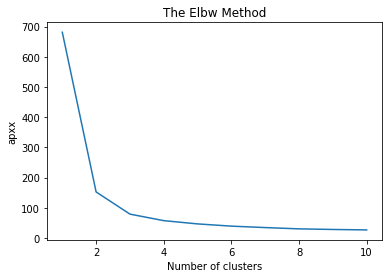

In [3]:
# Getting best number of cluster for dataset

from sklearn.cluster import KMeans 

dx = iris_df.iloc[:, [0, 1, 2, 3]].values

apxx = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dx)
    apxx.append(kmeans.inertia_)
    
# Plotting the output on line graph,
plt.plot(range(1, 11), apxx)
plt.title('The Elbw Method')
plt.xlabel('Number of clusters')
plt.ylabel('apxx') # Within cluster sum of squares
plt.show()

In [4]:
print("We find That Elbow shape is happened at the k = 3")

We find That Elbow shape is happened at the k = 3


In [5]:
#Creating K-means Classifier with k=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(dx)

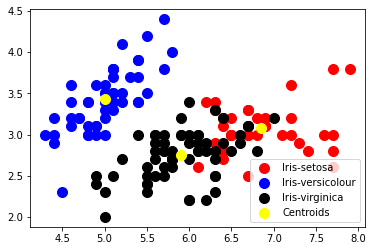

In [6]:
# Visualising the clusters - On the first two columns
plt.scatter(dx[y_kmeans == 0, 0], dx[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(dx[y_kmeans == 1, 0], dx[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(dx[y_kmeans == 2, 0], dx[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()